In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [81]:
df = pd.read_csv('./data/SR99_VDS1005210_2016_fill.csv', delimiter=';', parse_dates=True, index_col='datetime')

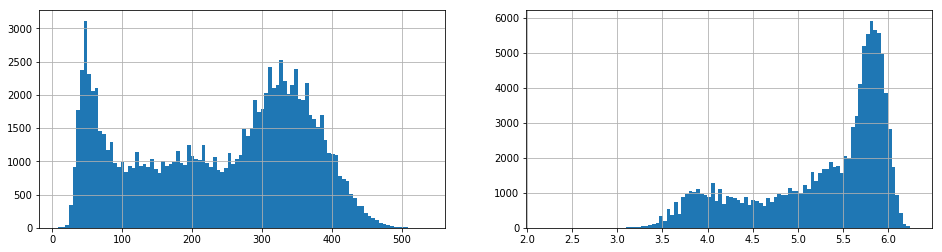

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
df['flow_5'].hist(bins=100, ax=axes[0])
df['flow_log'] = np.log1p(df['flow_5'])
df['flow_log'].hist(bins=100, ax=axes[1])
plt.show()

In [ ]:
# 数据平滑

In [98]:
# 特征工程
# lagging=5
def creat_lagging(df, lagging):
    cols, names = list(), list()
    for i in range(lagging, -1, -1):
        cols.append(df.shift(i))
        names.append('lagging%d' % i)
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    return agg

df_feture = creat_lagging(df, lagging=5)

# minute_of_hour
df_feture['minute'] = df.index.map(lambda date: date.minute)
# hour_of_day
df_feture['hour'] = df.index.map(lambda date: date.hour)
# day_of_week
df_feture['day_of_week'] = df.index.map(lambda date: date.weekday() + 1)
# day_of_month
# df_feture['day'] = df.index.map(lambda date: date.day)
# month_of_year
# df_feture['month'] = df.index.map(lambda date: date.month)
# vacation

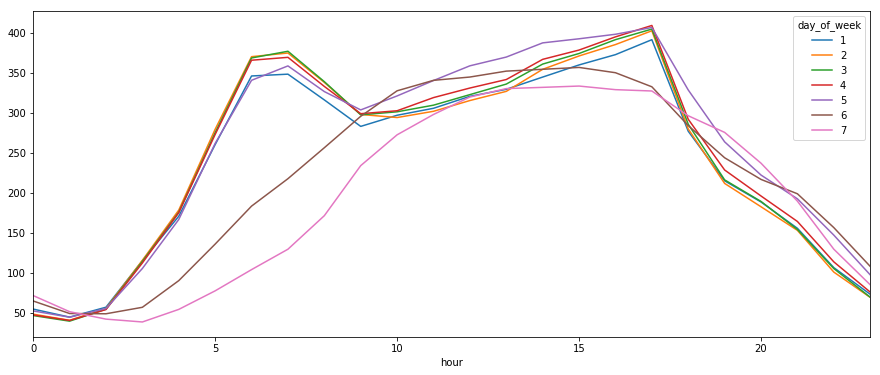

In [85]:
# 一天之内每小时平均流量的变化
df_feture.groupby(['hour', 'day_of_week'])['lagging0'].mean().unstack().plot()
plt.show()

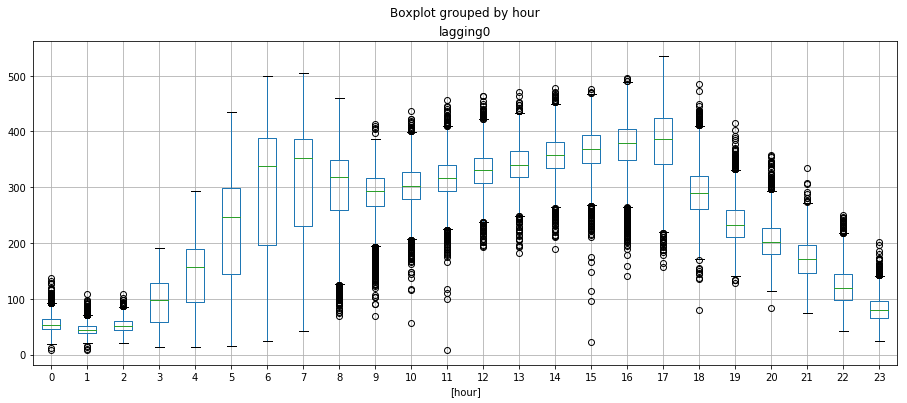

In [91]:
df_feture.boxplot(by=['hour'], column='lagging0')
plt.show()

In [99]:
df2 = pd.get_dummies(df_feture, columns=['day_of_week', 'hour', 'minute'])

In [100]:
df2

,lagging5,lagging4,lagging3,lagging2,lagging1,lagging0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,...,minute_10,minute_15,minute_20,minute_25,minute_30,minute_35,minute_40,minute_45,minute_50,minute_55
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,28.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-01 00:05:00,NaN,NaN,NaN,NaN,28.0,31.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-01 00:10:00,NaN,NaN,NaN,28.0,31.0,34.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2016-01-01 00:15:00,NaN,NaN,28.0,31.0,34.0,57.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2016-01-01 00:20:00,NaN,28.0,31.0,34.0,57.0,76.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2016-01-01 00:25:00,28.0,31.0,34.0,57.0,76.0,83.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2016-01-01 00:30:00,31.0,34.0,57.0,76.0,83.0,89.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2016-01-01 00:35:00,34.0,57.0,76.0,83.0,89.0,91.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2016-01-01 00:40:00,57.0,76.0,83.0,89.0,91.0,102.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# 暂时先用这么多特征了
# 训练

In [116]:
train = df2['2016-01']
test = df2['2016-02']
train = train.dropna()
feature = df2.columns.values.tolist()
feature.remove('lagging0')
X = train[feature].values
y = train['lagging0'].values

In [117]:
y

array([ 83.,  89.,  91., ...,  44.,  51.,  43.])